- 데이터 시각화 및 분석
  - 이상치
    - 통계적관점
      - 데이터가 평균에서 벗어난 정도를 나타내는 표준편차를 기준으로 정의 예들을어서 평균에 3표준 편차 이상 벗어난 값
      - IQR(Interquartile Range) 사용해서 Q1 - 1.5xIQR and Q3 + 1.5xIQR
    - 도메인 기반 정의
      - 도메인 지식에 따라서 특정 임계값을 초과하거나 미만인 값을 이상치로 간주

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 임의의 데이터 생성
np.random.seed(42)
data = np.random.normal(50,10,100)  # 평균 50, 표준편차 10인 정규분포 데이터
print(data)
data = np.append(data, [10,100])  # 이상치를 추가
print(data)

[54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044 45.36582307 45.34270246
 52.41962272 30.86719755 32.75082167 44.37712471 39.8716888  53.14247333
 40.91975924 35.87696299 64.65648769 47.742237   50.67528205 35.75251814
 44.55617275 51.1092259  38.49006423 53.75698018 43.9936131  47.0830625
 43.98293388 68.52278185 49.86502775 39.42289071 58.22544912 37.7915635
 52.08863595 30.40329876 36.71813951 51.96861236 57.3846658  51.71368281
 48.84351718 46.98896304 35.2147801  42.80155792 45.39361229 60.57122226
 53.4361829  32.36959845 53.24083969 46.1491772  43.23078    56.11676289
 60.30999522 59.31280119 41.60782477 46.90787624 53.31263431 59.75545127
 45.20825762 48.14341023 38.93665026 38.03793376 58.12525822 63.56240029
 49.27989878 60.03532898 53.61636025 43.54880245 53.61395606 65.38036566
 49.64173961 65.64643656 23.80254896 58.21902504 50.87047068 47.0099265
 50.91760777 30.12431085 47.80328112 53.57112572 64.77

In [ ]:
# 데이터 프레임 생성
df = pd.DataFrame(data, columns=['value'])
df.head()

,value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [ ]:
# IQR 기반 이상치 탐지
Q1 = df.value.quantile(0.25)
Q3 = df.value.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

43.98560368348251 54.664601193448426 10.678997509965917


In [5]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

27.967107418533633 70.6830974583973


In [10]:
# 이상치 표시
df['is_outlier'] = (df.value < lower_bound) | (df.value > upper_bound)

# 결과출력
print('IQR:', IQR)
print("lower bound : ", lower_bound)
print("upper bound : ", upper_bound)
print("Detected outliers:\n", df[df['is_outlier']])

IQR: 10.678997509965917
lower bound :  27.967107418533633
upper bound :  70.6830974583973
Detected outliers:
           value  is_outlier
74    23.802549        True
100   10.000000        True
101  100.000000        True


- 실제 사례
  - 금융
    - 신용카드 사기 탐지에서 비정상적으로 높은 거래 금액
  - 의료
    - 환자의 생체 데이터를 분석할 때 비정상적으로 높은 혈압이나 체온
  - 제조
    - 센서 데이터에서 비정상적인 값으로 기계 결함을 감지

신용카드 이상거래 탐지

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")

print("Path to dataset files:", path)


100%|██████████| 379k/379k [00:00<00:00, 70.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1


In [13]:
from glob import glob
filepath = glob(path+"/*.*")[0]
df = pd.read_csv(filepath)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- 컬럼수가 많아서 먼저 컬럼에 대한 조사
- 수치데이터에 해당하는 컬럼들에 대해서 IQR 조사를 진행

In [14]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [50]:
numeric_cols = df.describe().columns

In [36]:
# 이상치 판단 함수
def outlierFun(series_data,verbos=True):
  Q1 = series_data.quantile(0.25)
  Q3 = series_data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # 이상치 표시
  outlier = (series_data < lower_bound) | (series_data > upper_bound)

  # 결과출력
  if verbos:
    print('IQR:', IQR)
    print("lower bound : ", lower_bound)
    print("upper bound : ", upper_bound)
    print("Detected outliers:\n", series_data[outlier])
  return len(series_data[outlier])

In [37]:
outlierFun( df[numeric_cols[1]] )

IQR: 11.0
lower bound :  24.5
upper bound :  68.5
Detected outliers:
 251    73
254    70
Name: Customer_Age, dtype: int64


2

In [38]:
outlierFun(df[numeric_cols[2]])

IQR: 2.0
lower bound :  -2.0
upper bound :  6.0
Detected outliers:
 Series([], Name: Dependent_count, dtype: int64)


0

In [39]:
outlier_lists = [ outlierFun(df[col],verbos=False)  for col in numeric_cols]

In [40]:
outlier_lists

[0, 2, 0, 386, 0, 331, 629, 984, 0, 963, 396, 896, 2, 394, 0, 1691, 1688]

In [52]:
numeric_cols = np.array(numeric_cols)

In [53]:
numeric_cols[-1] ="Naive_Bayes_Classifier_Attrition_2"
numeric_cols[-2] ="Naive_Bayes_Classifier_Attrition_1"

In [54]:
pd.DataFrame(outlier_lists, index=numeric_cols, columns=['outlier_count'])

,outlier_count
CLIENTNUM,0
Customer_Age,2
Dependent_count,0
Months_on_book,386
Total_Relationship_Count,0
Months_Inactive_12_mon,331
Contacts_Count_12_mon,629
Credit_Limit,984
Total_Revolving_Bal,0
Avg_Open_To_Buy,963


간단한 이상거래 탐지 코드(Isolation Forest 사용)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

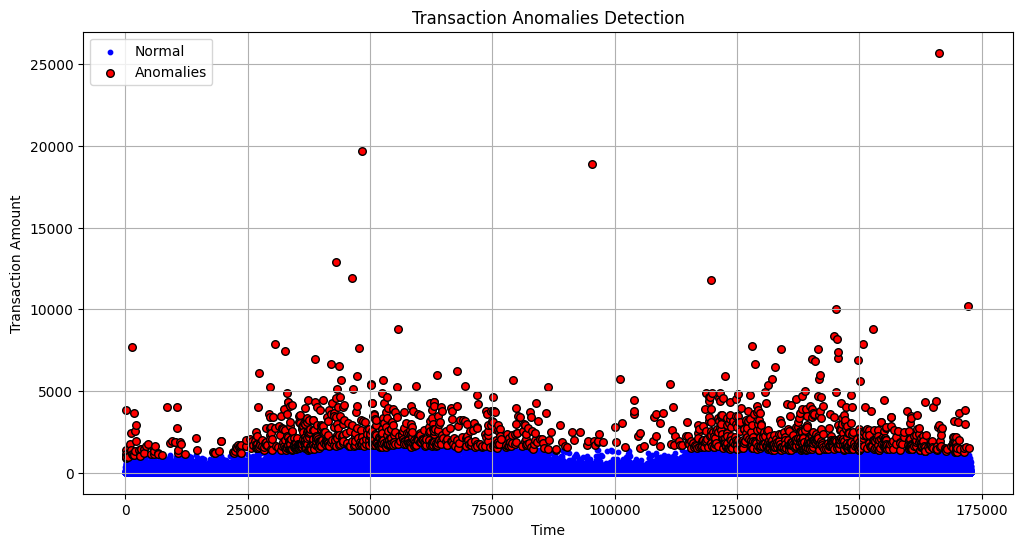

Detected anomalies: 1419
Sample anomalies:
      Time   Amount
51    36.0  1402.95
89    59.0  1142.02
140   87.0   919.60
150   93.0   937.69
164  103.0  3828.04


In [63]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Kaggle 데이터셋 다운로드
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = f"{path}/creditcard.csv"  # 데이터셋 파일 경로

# 데이터 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())
print(data.info())

# 데이터 전처리: 필요한 컬럼 선택 (Time, Amount)
X = data[['Time', 'Amount']]

# Isolation Forest 모델 초기화 및 학습
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(X)

# 이상 거래 탐지 결과 분리
anomalies = data[data['Anomaly'] == -1]
normal_transactions = data[data['Anomaly'] == 1]

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(normal_transactions['Time'], normal_transactions['Amount'],
            c='blue', label='Normal', s=10)
plt.scatter(anomalies['Time'], anomalies['Amount'],
            c='red', label='Anomalies', s=30, edgecolor='k')
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.title("Transaction Anomalies Detection")
plt.legend()
plt.grid(True)
plt.show()

# 결과 출력
print(f"Detected anomalies: {len(anomalies)}")
print("Sample anomalies:")
print(anomalies[['Time', 'Amount']].head())


# 사기 거래 탐지에서 중요한 점
- 정확성: 사기 거래를 탐지하면서 정상 거래를 잘못 분류(false positive)하지 않도록.
- 실시간 처리: 사기 거래는 즉각 차단이 중요하므로, 실시간 분석 능력 필요.
- 해석 가능성: 고객과 은행이 이해할 수 있도록 명확한 사유 제공.
- 클래스 불균형 처리: 사기 거래는 전체 거래의 0.1~0.5% 정도로 매우 적음.

# 실제로 적용 가능한 모델
- XGBoost/LightGBM: 지도 학습에서 뛰어난 성능.
- Autoencoder: 비지도 학습으로 이상치 탐지.
- LSTM: 시간 의존성을 활용해 시계열 거래 데이터를 분석.

  - 상관관계
  - matplotlib, seaboarn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
dtypes: float64(10)
memory usage: 21.7 MB
None


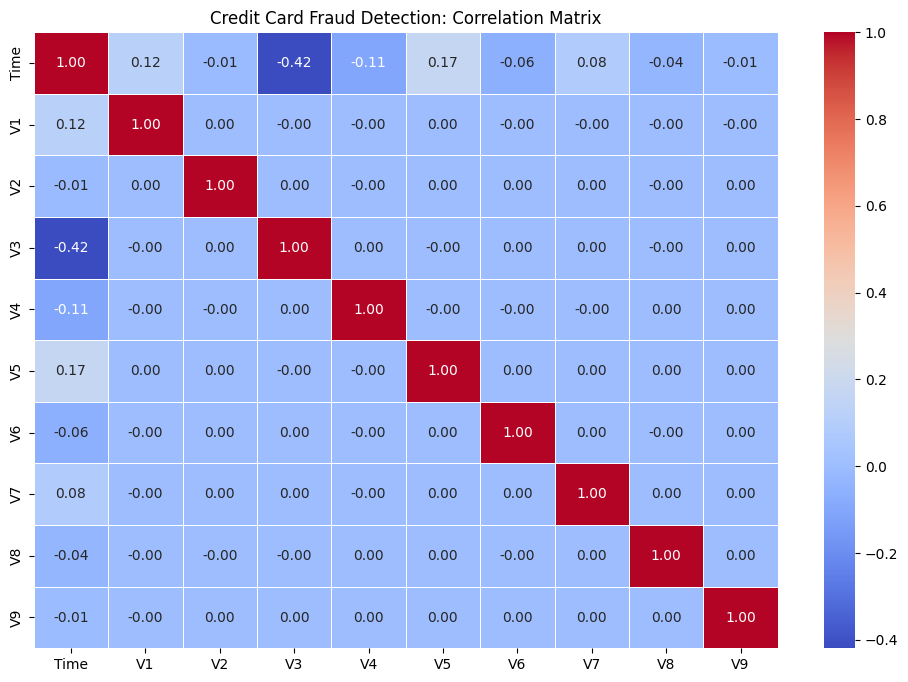


상위 상관관계 변수들:


In [69]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kaggle 데이터셋 다운로드
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = f"{path}/creditcard.csv"  # 데이터셋 파일 경로

# 데이터 로드
data = pd.read_csv(file_path)
data = data.iloc[:,:10]
# 데이터 정보 확인
print(data.info())

# 데이터의 상관관계 계산
correlation_matrix = data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Credit Card Fraud Detection: Correlation Matrix")
plt.show()

# 특정 변수 간 상관관계 확인 (예: 'Amount'와 다른 변수들)
print("\n상위 상관관계 변수들:")
# print(correlation_matrix["Amount"].sort_values(ascending=False))


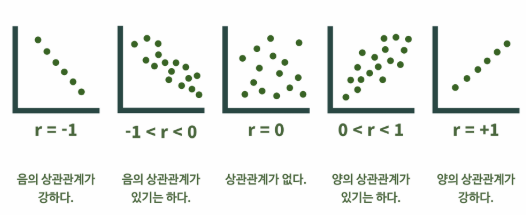

중요변수만 선택해서 상관계를 시각화